In [70]:
# 100*100的地图
# 3、6、9行/列 组合的路网
# 在路网基础上进行噪声生成
# 每一个模拟GPS点对应网格上的ID 从1-100
# 先手动挑十条路径作为二维数组 手动生成1十条noise路径进行实验
import matplotlib.pyplot as plt
from pylab import xticks,yticks,np

In [118]:
Y= [
    [21,22,23,24,25,26,16,6],
    [21,22,23,24,25,26,36,46],
    [51,52,53,54,55,56,46,36],
    [51,52,53,54,55,56,66,76],
    [3,13,23,24,25,26,16,6]
]
X = [
    [21,22,23,14,25,26,16,6],
    [21,22,23,14,25,26,36,46],
    [51,52,53,44,55,56,46,36],
    [51,52,53,64,55,56,66,76],
    [3,13,23,14,25,26,16,6]
]

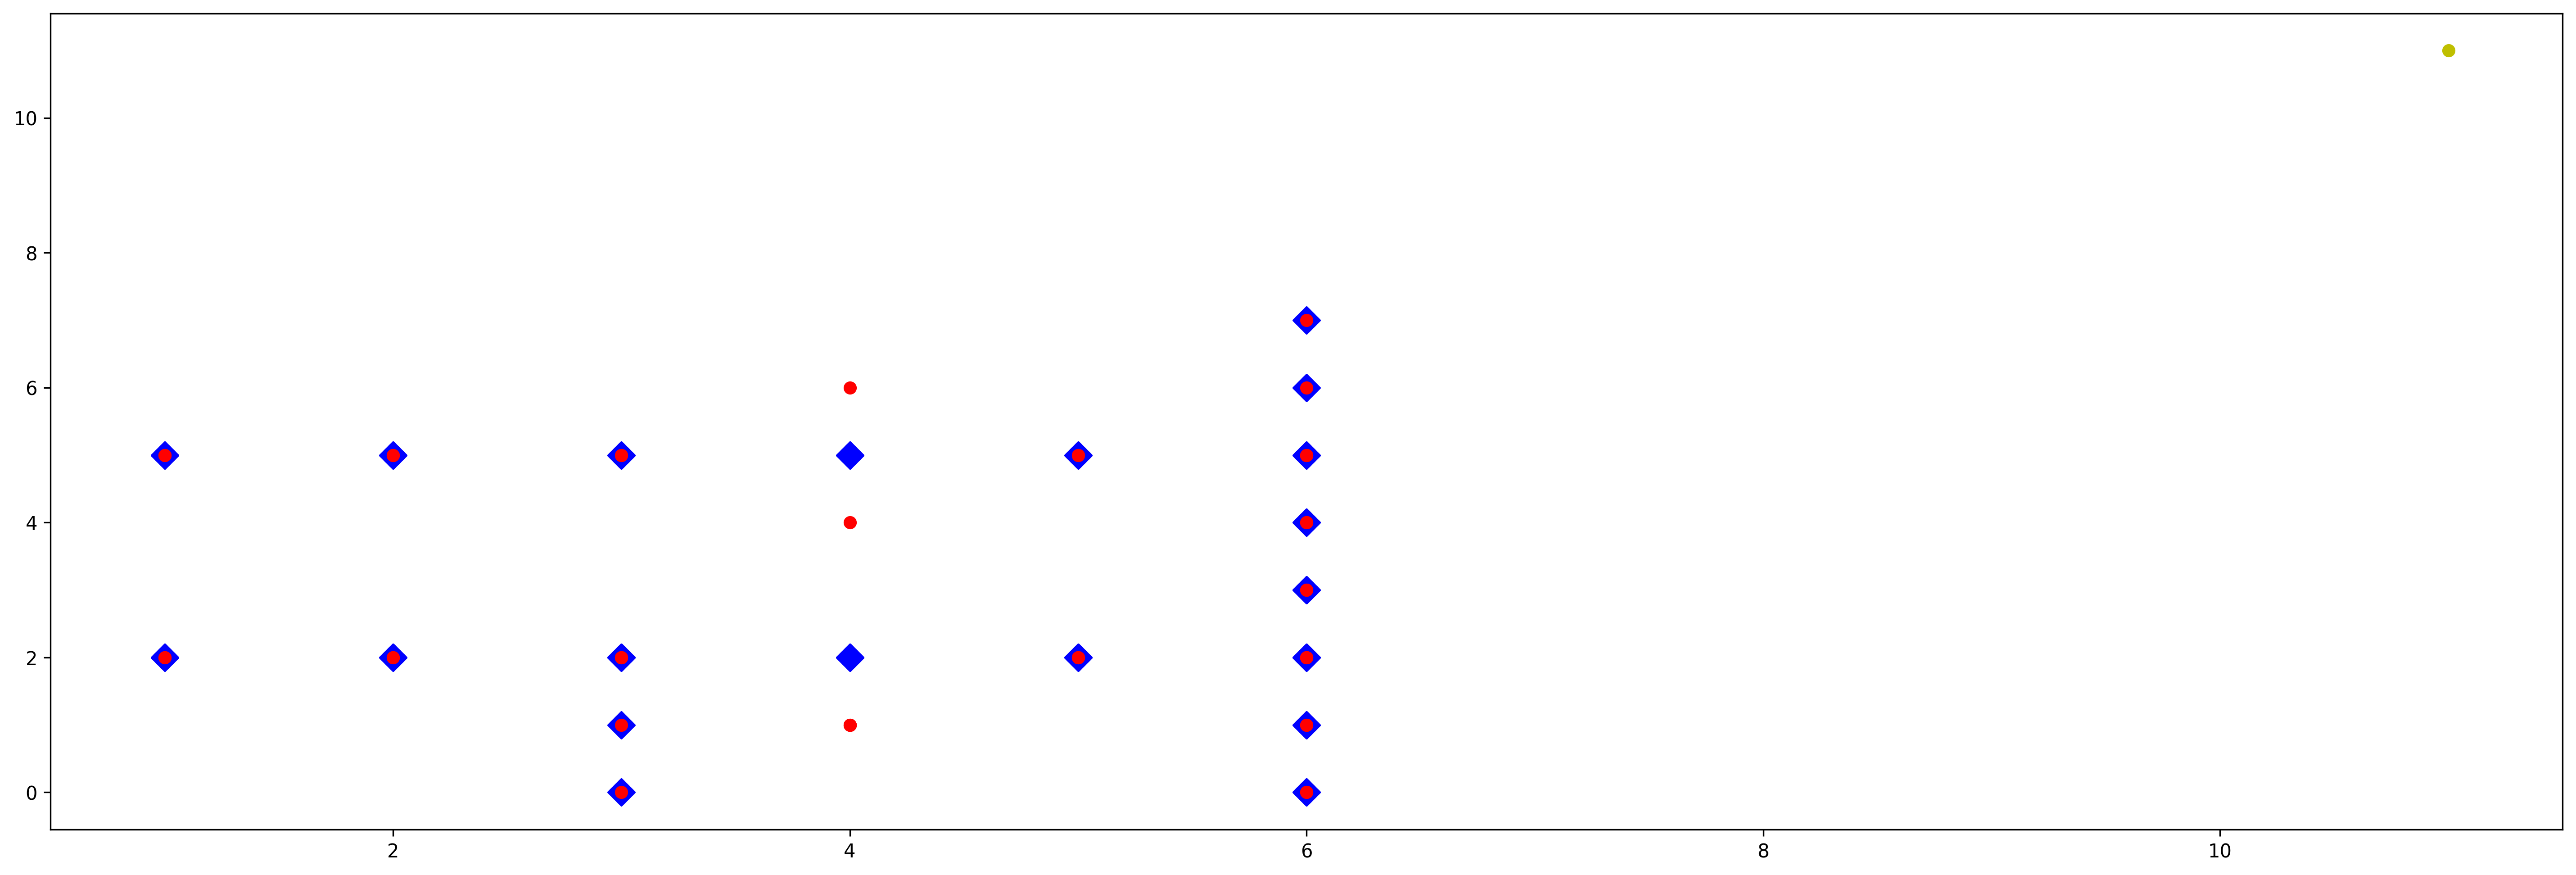

In [93]:
x = list(range(1,10+1))
y = list(range(1,10+1))
x1 = []
y1 = []
x2 = []
y2 = []
for i in Y:
    for j in i:
        k = j%10
        x1.append(k)
        m =int(j/10) 
        y1.append(m)
for i in X:
    for j in i:
        k = j%10
        x2.append(k)
        m =int(j/10) 
        y2.append(m)
plt.figure(dpi=300,figsize=(24,8))
plt.scatter(11, 11,c='y',cmap='viridis')
plt.scatter(x1, y1,c='b', s=100,marker="D",cmap='viridis')
plt.scatter(x2, y2,c='r',cmap='viridis')


plt.show()

In [91]:
from keras.models import Sequential
from keras.layers.core import Activation, RepeatVector, Dropout, Dense
from keras.layers import TimeDistributed,Input
from keras.models import Model
from keras.layers.recurrent import LSTM

Using TensorFlow backend.


In [137]:
TIME_STEPS = 8
INPUT_SIZE = 100
CELL_SIZE = 100
inputs = Input(shape=[TIME_STEPS,INPUT_SIZE])
x = LSTM(CELL_SIZE,input_shape=(TIME_STEPS,INPUT_SIZE),return_sequences='true')(inputs)
model = Model(inputs,x)
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 8, 100)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 8, 100)            80400     
Total params: 80,400
Trainable params: 80,400
Non-trainable params: 0
_________________________________________________________________


In [138]:
batch_size=32
seq_len=8
max_no=100
x = np.zeros((batch_size, seq_len, max_no), dtype=np.float32)
y = np.zeros((batch_size, seq_len, max_no), dtype=np.float32)                                                                                            

In [160]:
for ind, batch in enumerate(X):
    for j,elem in enumerate(batch):
        x[ind, j, elem] = 1
        
for ind, batch in enumerate(Y):
    for j, elem in enumerate(batch):
        y[ind, j, elem] = 1

In [161]:
for i in range(101):
    loss, acc =  model.train_on_batch(x, y)
    print(loss,acc)

nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 0.84375
nan 

In [145]:
testX = [[21,22,23,14,25,26,16,6]]

In [147]:
def encode(X, seq_len, vocab_size):
    x = np.zeros((len(X), seq_len, vocab_size), dtype=np.float32)
    for ind, batch in enumerate(X):
        for j, elem in enumerate(batch):
            x[ind, j, elem] = 1
    return x


In [152]:
test = encode(testX, TIME_STEPS, INPUT_SIZE)
test

array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [155]:
model.predict(test, batch_size=1)

array([[[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
    